In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
df = pd.read_csv('wages.csv')


In [324]:
df = df.rename(columns={'Real daily wages in pounds, England. 1260 ? 1994': 'pounds'})

In [325]:
df=df.drop(735)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 734
Data columns (total 2 columns):
Year      735 non-null object
pounds    735 non-null object
dtypes: object(2)
memory usage: 17.2+ KB


In [326]:
df['pounds']=df['pounds'].astype(str).astype(float)
df['Year']=df['Year'].astype(str).astype(int)

In [327]:
df = df[df.Year>1800]

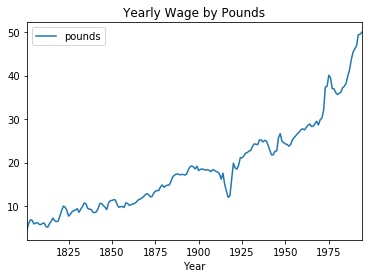

In [328]:
df.plot(x='Year', y='pounds')
plt.title('Yearly Wage by Pounds')
plt.show()

In [329]:
df['diff_1'] = df.pounds - df.pounds.shift()

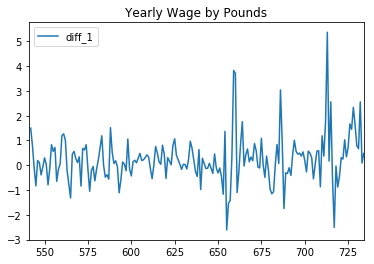

In [330]:
df.plot(y='diff_1')
plt.title('Yearly Wage by Pounds')
plt.show()

In [41]:
from statsmodels.tsa.stattools import pacf

C:\Users\Connor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


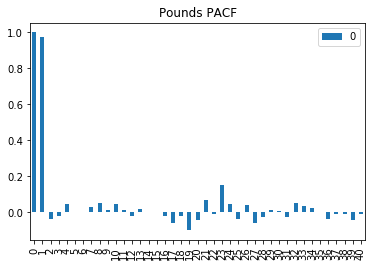

In [331]:
x_acf = pd.DataFrame(pacf(df.pounds))
x_acf.plot(kind='bar')
plt.title("Pounds PACF")

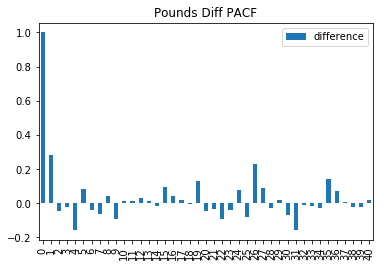

In [332]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Pounds Diff PACF")
plt.legend(['difference'])

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [340]:
df['Year']= pd.to_datetime(df.Year, format='%Y') 

In [342]:
df.index= df.Year

In [343]:
df

,Year,pounds,diff_1
Year,,,
1801-01-01,1801-01-01,4.50,NaN
1802-01-01,1802-01-01,6.00,1.50
1803-01-01,1803-01-01,6.81,0.81
1804-01-01,1804-01-01,6.71,-0.10
1805-01-01,1805-01-01,5.88,-0.83
1806-01-01,1806-01-01,6.07,0.19
1807-01-01,1807-01-01,6.18,0.11
1808-01-01,1808-01-01,5.79,-0.39
1809-01-01,1809-01-01,5.72,-0.07


In [339]:
pd.to_datetime(df.Year)

Year
1970-01-01 00:00:00.000001801   1970-01-01 00:00:00.000001801
1970-01-01 00:00:00.000001802   1970-01-01 00:00:00.000001802
1970-01-01 00:00:00.000001803   1970-01-01 00:00:00.000001803
1970-01-01 00:00:00.000001804   1970-01-01 00:00:00.000001804
1970-01-01 00:00:00.000001805   1970-01-01 00:00:00.000001805
1970-01-01 00:00:00.000001806   1970-01-01 00:00:00.000001806
1970-01-01 00:00:00.000001807   1970-01-01 00:00:00.000001807
1970-01-01 00:00:00.000001808   1970-01-01 00:00:00.000001808
1970-01-01 00:00:00.000001809   1970-01-01 00:00:00.000001809
1970-01-01 00:00:00.000001810   1970-01-01 00:00:00.000001810
1970-01-01 00:00:00.000001811   1970-01-01 00:00:00.000001811
1970-01-01 00:00:00.000001812   1970-01-01 00:00:00.000001812
1970-01-01 00:00:00.000001813   1970-01-01 00:00:00.000001813
1970-01-01 00:00:00.000001814   1970-01-01 00:00:00.000001814
1970-01-01 00:00:00.000001815   1970-01-01 00:00:00.000001815
1970-01-01 00:00:00.000001816   1970-01-01 00:00:00.000001816
197

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 1970-01-01 00:00:00.000001801 to 1970-01-01 00:00:00.000001994
Data columns (total 3 columns):
Year      194 non-null int32
pounds    194 non-null float64
diff_1    193 non-null float64
dtypes: float64(2), int32(1)
memory usage: 5.3 KB


In [345]:
model = ARIMA(df.pounds, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.pounds   No. Observations:                  193
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -252.831
Method:                       css-mle   S.D. of innovations              0.897
Date:                Wed, 04 Apr 2018   AIC                            513.661
Time:                        15:07:57   BIC                            526.712
Sample:                    01-01-1802   HQIC                           518.947
                         - 01-01-1994                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2383      0.086      2.776      0.006       0.070       0.407
ar.L1.D.pounds     0.1042      0.340      0.307      0.759      -0.562       0.770
ma.L1.D.pounds     0.1930      0.342

In [346]:
model = ARIMA(df.pounds, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.pounds   No. Observations:                  193
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -252.262
Method:                       css-mle   S.D. of innovations              0.894
Date:                Wed, 04 Apr 2018   AIC                            514.524
Time:                        15:09:47   BIC                            530.838
Sample:                    01-01-1802   HQIC                           521.131
                         - 01-01-1994                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2389      0.087      2.753      0.006       0.069       0.409
ar.L1.D.pounds    -0.4281      0.267     -1.604      0.110      -0.951       0.095
ar.L2.D.pounds     0.1437      0.119

In [347]:
model = ARIMA(df.pounds, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D2.pounds   No. Observations:                  192
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -252.269
Method:                       css-mle   S.D. of innovations              0.889
Date:                Fri, 06 Apr 2018   AIC                            516.538
Time:                        13:02:08   BIC                            536.083
Sample:                    01-01-1803   HQIC                           524.454
                         - 01-01-1994                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.002      1.779      0.077      -0.000       0.006
ar.L1.D2.pounds    -0.4283      0.261     -1.642      0.102      -0.940       0.083
ar.L2.D2.pounds     0.1235      

In [351]:
model = ARIMA(df.pounds, order=(3,2,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D2.pounds   No. Observations:                  192
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -250.691
Method:                       css-mle   S.D. of innovations              0.882
Date:                Fri, 06 Apr 2018   AIC                            517.381
Time:                        13:02:38   BIC                            543.441
Sample:                    01-01-1803   HQIC                           527.936
                         - 01-01-1994                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0026      0.002      1.689      0.093      -0.000       0.006
ar.L1.D2.pounds    -1.1543        nan        nan        nan         nan         nan
ar.L2.D2.pounds    -0.3700      

C:\Users\Connor\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Connor\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Connor\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Connor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Connor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Connor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure

In [352]:
model = ARIMA(df.pounds, order=(1,2,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D2.pounds   No. Observations:                  192
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -252.121
Method:                       css-mle   S.D. of innovations              0.886
Date:                Fri, 06 Apr 2018   AIC                            516.242
Time:                        13:02:51   BIC                            535.787
Sample:                    01-01-1803   HQIC                           524.158
                         - 01-01-1994                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0026      0.001      2.452      0.015       0.001       0.005
ar.L1.D2.pounds     0.8379      0.158      5.301      0.000       0.528       1.148
ma.L1.D2.pounds    -1.5752      